## Integrate and Fire Model 
### Group 6: *Maia Barrow, Cianna French, Eden Kier Sydney Moodie, Wasifa Nasrin, Kelly Stouffer, Vivan Tadakamalla*
 An integrated firing model, or IF for short, is one of the most popular models used in computational neuroscience for modeling and analyzing the behavior of neural systems in response to a stimulus. The IF model is a simplified neuron model and can illustrate how electrical input is accumulated over time. 

Some uses of IF models in research:
1. Population Activity
    * Integrate-and-Fire models can be used to understand spiking behaviors of specific neuronal populations. This can be analyzed to see how populations synchronize firing due to a stimulus. 
2. Neurodegenerative Research 
    * IFM's can be used to study changes in neuron firing as a result of degenerative diseases such as Parkinsons and Alzheimers. 
    * This article talks about modifications made to the integrate-and-fire model to account for metabolic dependencies which are characteristic in certain neurodegenerative disease pathology. https://onlinelibrary.wiley.com/doi/10.1111/ejn.15326 


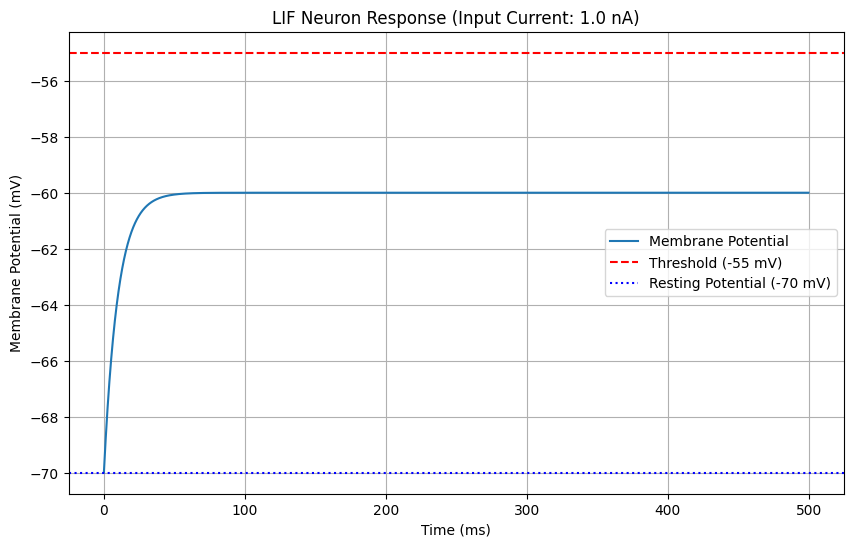

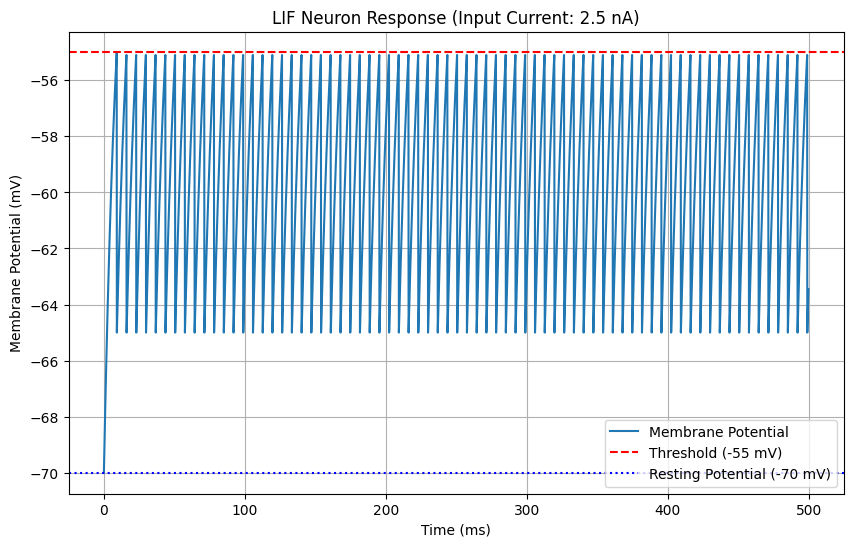

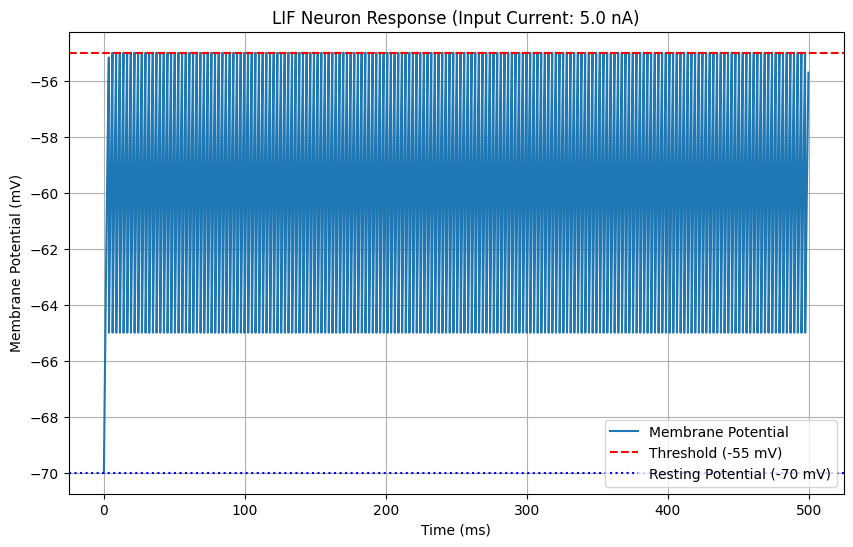

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# LIF model parameters
resting_potential = -70.0  # Resting potential in mV
threshold = -55.0          # Threshold potential in mV
reset_potential = -65.0    # Reset potential after a spike in mV
membrane_resistance = 10.0 # Membrane resistance in MOhm
membrane_time_constant = 10.0  # Membrane time constant in ms

def lif_model(input_current, dt=0.1, simulation_time=500):
    """
    Simulates a leaky integrate-and-fire neuron.

    Parameters:
        input_current (array): Input current in nA (one value per time step).
        dt (float): Time step for simulation in ms.
        simulation_time (float): Total simulation time in ms.

    Returns:
        time (array): Array of time points.
        membrane_potential (array): Membrane potential over time.
        spikes (list): Indices of spike times.
    """
    num_steps = int(simulation_time / dt)
    time = np.arange(0, simulation_time, dt)
    membrane_potential = np.full(num_steps, resting_potential)
    spikes = []

    for t in range(1, num_steps):
        # Update membrane potential based on LIF equation
        dv = (
            (-membrane_potential[t-1] + resting_potential + \
             membrane_resistance * input_current[t]) \
            / membrane_time_constant
        ) * dt
        membrane_potential[t] = membrane_potential[t-1] + dv

        # Check for spike
        if membrane_potential[t] >= threshold:
            membrane_potential[t] = reset_potential
            spikes.append(t * dt)  # Record spike time

    return time, membrane_potential, spikes

# Simulation parameters
simulation_time = 500  # ms
dt = 0.1  # Time step in ms

def run_simulation_and_plot(input_current_amplitude):
    # Generate input current (constant input)
    input_current = np.full(int(simulation_time / dt), input_current_amplitude)

    # Simulate LIF model
    time, membrane_potential, spikes = lif_model(input_current, dt, simulation_time)

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(time, membrane_potential, label="Membrane Potential")
    plt.axhline(threshold, color="r", linestyle="--", label="Threshold (-55 mV)")
    plt.axhline(resting_potential, color="b", linestyle=":", label="Resting Potential (-70 mV)")
    plt.xlabel("Time (ms)")
    plt.ylabel("Membrane Potential (mV)")
    plt.title(f"LIF Neuron Response (Input Current: {input_current_amplitude} nA)")
    plt.legend()
    plt.grid()
    plt.show()

# Run simulations with different input currents
input_currents = [1.0, 2.5, 5.0]  # Input currents in nA
for input_current in input_currents:
    run_simulation_and_plot(input_current)


**Looking at the above visualization/based on what you know regarding the LIF model--what aspect of this model is most unlike a real biological neuron? What is missing? Additionally what aspects are like a biological neuron? Compare and Contrast the two.**

**What was the most challenging aspect of this homework?**

**Estimate how long it took you to complete this homework.**